In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cars = pd.read_csv('data.csv').drop(columns = 'Unnamed: 0')
df_cars

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [4]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  o

In [5]:
for column in df_cars.columns:
  if df_cars[column].isna().sum() > 0:
    print(f'La colonne {column} contient {df_cars[column].isna().sum()} valeur(s) nulle(s).')

La colonne color contient 166 valeur(s) nulle(s).
La colonne registration_date contient 4 valeur(s) nulle(s).
La colonne power_kw contient 134 valeur(s) nulle(s).
La colonne power_ps contient 129 valeur(s) nulle(s).
La colonne fuel_consumption_l_100km contient 26873 valeur(s) nulle(s).
La colonne mileage_in_km contient 152 valeur(s) nulle(s).
La colonne offer_description contient 1 valeur(s) nulle(s).


## Nettoyage

In [6]:
df_cars_c = df_cars.dropna()

In [7]:
df_cars_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223836 entries, 0 to 251076
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     223836 non-null  object 
 1   model                     223836 non-null  object 
 2   color                     223836 non-null  object 
 3   registration_date         223836 non-null  object 
 4   year                      223836 non-null  object 
 5   price_in_euro             223836 non-null  object 
 6   power_kw                  223836 non-null  object 
 7   power_ps                  223836 non-null  object 
 8   transmission_type         223836 non-null  object 
 9   fuel_type                 223836 non-null  object 
 10  fuel_consumption_l_100km  223836 non-null  object 
 11  fuel_consumption_g_km     223836 non-null  object 
 12  mileage_in_km             223836 non-null  float64
 13  offer_description         223836 non-null  object

In [8]:
df_cars_c['year'].value_counts()

year
2019         25593
2018         21461
2023         19461
2017         17281
2022         17153
2020         15472
2016         13883
2021         12463
2015         11864
2014          9900
2013          8737
2012          7484
2011          6957
2009          6039
2010          5648
2008          4517
2007          3770
2006          3686
2005          3157
2004          2457
2003          1937
2002          1442
2001          1076
2000           843
1999           620
1998           371
1997           264
1996           132
1995            65
Petrol          46
Hybrid          24
Diesel          20
Manual           4
04/2006          1
LPG              1
03/2015          1
39.900 km        1
18.990 km        1
05/2021          1
Automatic        1
11/2013          1
CNG              1
Name: count, dtype: int64

In [9]:
# Retirer toutes les valeurs qui ne sont pas des années ou années impossibles :

annee_filtre = df_cars_c['year'].apply(lambda x: x.isdigit() and len(x) == 4)
df_cars_c = df_cars_c[annee_filtre]

annee_impossible = df_cars_c[df_cars_c['year'] == '3700'].index
df_cars_c = df_cars_c.drop(index = annee_impossible)

df_cars_c = df_cars_c.reset_index(drop=True)

df_cars_c

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
3,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
4,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223728,volvo,Volvo XC60,silver,04/2023,2023,81350,228,310,Automatic,Hybrid,"7,4 l/100 km",167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
223729,volvo,Volvo XC60,silver,05/2023,2023,55400,145,197,Automatic,Diesel,"5,6 l/100 km",142 g/km,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
223730,volvo,Volvo XC60,silver,03/2023,2023,54500,145,197,Automatic,Diesel,"5,6 l/100 km",142 g/km,5900.0,B4 Autom. Plus Dark Sitzhzg.
223731,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [10]:
df_cars_c['year'] = pd.to_datetime(df_cars_c['year'])
df_cars_c['year'] = df_cars_c['year'].dt.year

In [11]:
df_cars_c['year'].value_counts()

year
2019    25593
2018    21461
2023    19461
2017    17281
2022    17153
2020    15472
2016    13883
2021    12463
2015    11864
2014     9900
2013     8737
2012     7484
2011     6957
2009     6039
2010     5648
2008     4517
2007     3770
2006     3686
2005     3157
2004     2457
2003     1937
2002     1442
2001     1076
2000      843
1999      620
1998      371
1997      264
1996      132
1995       65
Name: count, dtype: int64

In [12]:
# Retirer toutes les consommations au 100 km qui ne sont pas au format numérique uniquement ou à la bonne unité :

df_cars_c['fuel_consumption_l_100km'] = df_cars_c['fuel_consumption_l_100km'].str.replace(' l/100 km', '').str.replace(',', '.')

df_cars_c

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,10.9,260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,9.5,225 g/km,189500.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,7.2,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
3,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,9.5,225 g/km,47307.0,2.0 16V Twin Spark
4,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,8.8,210 g/km,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223728,volvo,Volvo XC60,silver,04/2023,2023,81350,228,310,Automatic,Hybrid,7.4,167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
223729,volvo,Volvo XC60,silver,05/2023,2023,55400,145,197,Automatic,Diesel,5.6,142 g/km,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
223730,volvo,Volvo XC60,silver,03/2023,2023,54500,145,197,Automatic,Diesel,5.6,142 g/km,5900.0,B4 Autom. Plus Dark Sitzhzg.
223731,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,7.6,202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [13]:
df_cars_c['fuel_consumption_l_100km'].value_counts()

fuel_consumption_l_100km
4.9                8140
5.1                7649
5.5                7602
5.9                7505
5.3                7424
                   ... 
594 km (Ort)          1
464 km (Ort)          1
687 km (Ort)          1
12.6 kWh/100 km       1
93 km (Ort)           1
Name: count, Length: 531, dtype: int64

In [14]:
format_regex = r'^\d+\.\d+$'
df_cars_c = df_cars_c[df_cars_c['fuel_consumption_l_100km'].astype(str).str.match(format_regex, na=False) & ~df_cars_c['fuel_consumption_l_100km'].astype(str).str.contains('[a-zA-Z]', na=False)]

df_cars_c = df_cars_c.reset_index(drop = True)

df_cars_c

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,10.9,260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,9.5,225 g/km,189500.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,7.2,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
3,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,9.5,225 g/km,47307.0,2.0 16V Twin Spark
4,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,8.8,210 g/km,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,volvo,Volvo XC60,silver,04/2023,2023,81350,228,310,Automatic,Hybrid,7.4,167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
199995,volvo,Volvo XC60,silver,05/2023,2023,55400,145,197,Automatic,Diesel,5.6,142 g/km,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
199996,volvo,Volvo XC60,silver,03/2023,2023,54500,145,197,Automatic,Diesel,5.6,142 g/km,5900.0,B4 Autom. Plus Dark Sitzhzg.
199997,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,7.6,202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [14]:
df_cars_c['mileage_in_km'] = df_cars_c['mileage_in_km'].astype(int)
df_cars_c['mileage_in_km'].value_counts()

mileage_in_km
10       5887
50       1253
15       1052
20       1047
5         900
         ... 
9376        1
1614        1
15067       1
217         1
1506        1
Name: count, Length: 60134, dtype: int64

In [15]:
df_cars_c['price_in_euro'] = df_cars_c['price_in_euro'].astype(int)
df_cars_c['price_in_euro']

0          1300
1          4900
2         17950
3          7900
4          3500
          ...  
199994    81350
199995    55400
199996    54500
199997    89690
199998    61521
Name: price_in_euro, Length: 199999, dtype: int32

In [16]:
df_cars_c.describe()

,year,price_in_euro,mileage_in_km
count,199999.00000,1.999990e+05,1.999990e+05
mean,2016.04347,2.490267e+04,8.853210e+04
std,5.44721,3.255046e+04,7.870120e+04
min,1995.00000,1.200000e+02,0.000000e+00
25%,2013.00000,1.149000e+04,2.785000e+04
50%,2017.00000,1.899000e+04,7.200000e+04
75%,2020.00000,2.897000e+04,1.311585e+05
max,2023.00000,3.250000e+06,2.830000e+06


In [17]:
df_cars_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     199999 non-null  object 
 1   model                     199999 non-null  object 
 2   color                     199999 non-null  object 
 3   registration_date         199999 non-null  object 
 4   year                      199999 non-null  int32  
 5   price_in_euro             199999 non-null  int32  
 6   power_kw                  199999 non-null  object 
 7   power_ps                  199999 non-null  object 
 8   transmission_type         199999 non-null  object 
 9   fuel_type                 199999 non-null  object 
 10  fuel_consumption_l_100km  199999 non-null  object 
 11  fuel_consumption_g_km     199999 non-null  object 
 12  mileage_in_km             199999 non-null  float64
 13  offer_description         199999 non-null  o

In [18]:
df_cars_c['power_kw'] = df_cars_c['power_kw'].astype(int)

In [19]:
df_cars_c['power_ps'] = df_cars_c['power_ps'].astype(int)

In [20]:
df_cars_c['fuel_consumption_l_100km'] = df_cars_c['fuel_consumption_l_100km'].replace('.', ',')
df_cars_c['fuel_consumption_l_100km'] = df_cars_c['fuel_consumption_l_100km'].astype(float)

In [22]:
# Transfert du fichier nettoyé en csv
df_cars_c.to_csv('data_cars_clean.csv', sep = ";", index = False)

## Visualisations générales

### Année du véhicule, puissance kw, puissance ps et consommation au 100 km

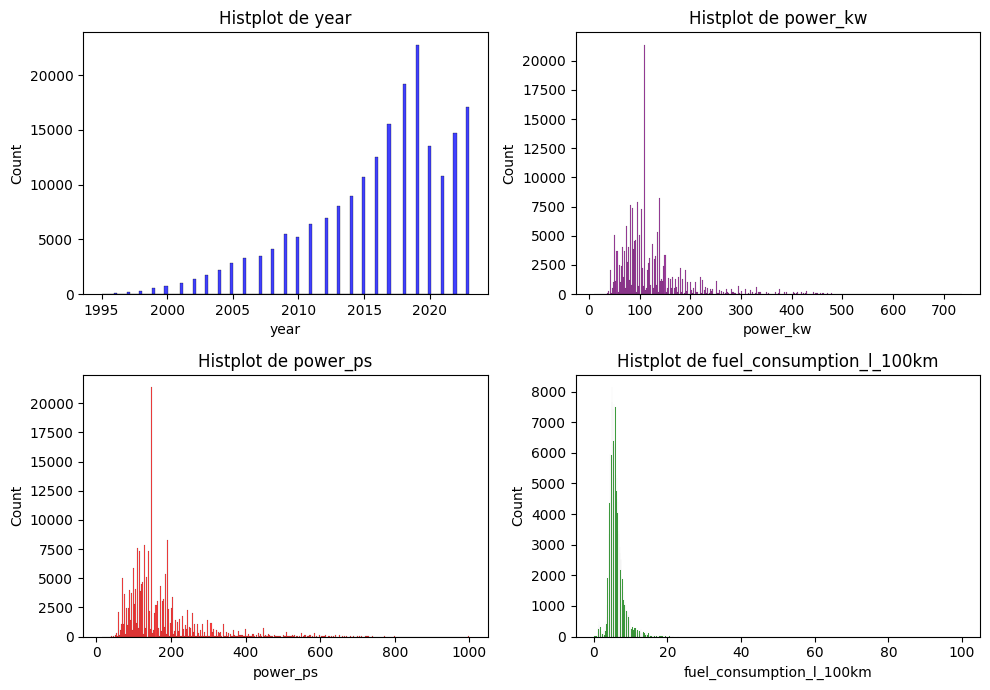

In [21]:
colonnes_df = ['year', 'power_kw',	'power_ps', 'fuel_consumption_l_100km']
df_cars_c[['power_kw',	'power_ps', 'fuel_consumption_l_100km']] = df_cars_c[['power_kw',	'power_ps', 'fuel_consumption_l_100km']].astype(float)
colors = ['blue', 'purple', 'red', 'green']

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize = (10, 7))

axes = axes.flatten()

for i, col in enumerate(colonnes_df):
    sns.histplot(df_cars_c[col], ax = axes[i], color = colors[i])
    axes[i].set_title(f'Histplot de {col}')

plt.tight_layout()
plt.show()

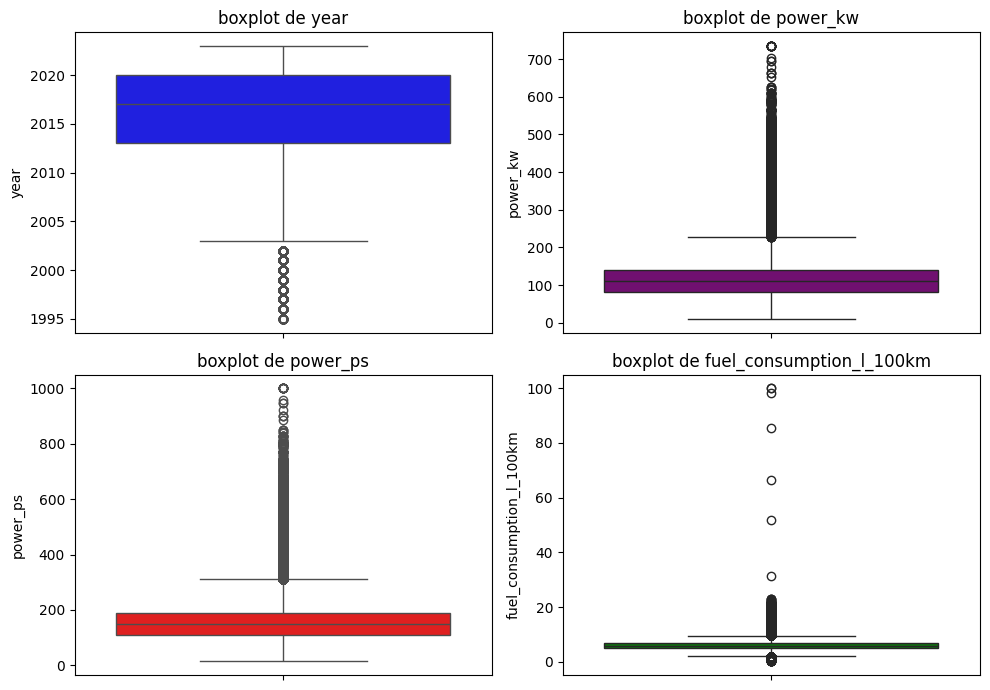

In [22]:
colors = ['blue', 'purple', 'red', 'green']
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize = (10, 7))

axes = axes.flatten()

for i, col in enumerate(colonnes_df):
    sns.boxplot(df_cars_c[col], ax = axes[i], color = colors[i])
    axes[i].set_title(f'boxplot de {col}')

plt.tight_layout()
plt.show()

### Prix du véhicule en euros et caractéristiques techniques

In [23]:
for column in df_cars_c.columns:
  if df_cars_c[column].isna().sum() > 0:
    print(f'La colonne {column} contient {df_cars_c[column].isna().sum()} valeur(s) nulle(s).')

Il n'y a pas de valeurs nulles.

In [24]:
bins = list(range(0, df_cars_c['price_in_euro'].max() + 30000, 30000))
bins

[0,
 30000,
 60000,
 90000,
 120000,
 150000,
 180000,
 210000,
 240000,
 270000,
 300000,
 330000,
 360000,
 390000,
 420000,
 450000,
 480000,
 510000,
 540000,
 570000,
 600000,
 630000,
 660000,
 690000,
 720000,
 750000,
 780000,
 810000,
 840000,
 870000,
 900000,
 930000,
 960000,
 990000,
 1020000,
 1050000,
 1080000,
 1110000,
 1140000,
 1170000,
 1200000,
 1230000,
 1260000,
 1290000,
 1320000,
 1350000,
 1380000,
 1410000,
 1440000,
 1470000,
 1500000,
 1530000,
 1560000,
 1590000,
 1620000,
 1650000,
 1680000,
 1710000,
 1740000,
 1770000,
 1800000,
 1830000,
 1860000,
 1890000,
 1920000,
 1950000,
 1980000,
 2010000,
 2040000,
 2070000,
 2100000,
 2130000,
 2160000,
 2190000,
 2220000,
 2250000,
 2280000,
 2310000,
 2340000,
 2370000,
 2400000,
 2430000,
 2460000,
 2490000,
 2520000,
 2550000,
 2580000,
 2610000,
 2640000,
 2670000,
 2700000,
 2730000,
 2760000,
 2790000,
 2820000,
 2850000,
 2880000,
 2910000,
 2940000,
 2970000,
 3000000,
 3030000,
 3060000,
 3090000,
 3

In [25]:
groupe_prix_eu = pd.cut(round(df_cars_c['price_in_euro']), bins = bins, right = False)

variables_cars = ['year', 'power_kw', 'power_ps', 'fuel_consumption_l_100km']
colonne_sans_nan = df_cars_c[variables_cars].dropna() # NB : à vérifier car n'a pas retiré les valeurs NaN???

moyennes_par_groupe_prix = colonne_sans_nan.groupby(groupe_prix_eu).mean()

#moyennes_par_groupe_prix['year'] = pd.to_datetime(moyennes_par_groupe_prix['year'], format = '%Y', errors = 'coerce')

moyennes_par_groupe_prix[['power_kw', 'power_ps', 'fuel_consumption_l_100km']] = round(
    moyennes_par_groupe_prix[['power_kw', 'power_ps', 'fuel_consumption_l_100km']], 2
)

moyennes_par_groupe_prix

,year,power_kw,power_ps,fuel_consumption_l_100km
price_in_euro,,,,
"[0, 30000)",2014.968142,104.03,141.53,5.79
"[30000, 60000)",2019.808970,164.17,223.26,6.36
"[60000, 90000)",2019.825688,246.77,335.57,8.22
"[90000, 120000)",2019.092885,313.90,426.80,9.64
"[120000, 150000)",2018.781720,371.25,504.82,11.14
...,...,...,...,...
"[3120000, 3150000)",NaN,NaN,NaN,NaN
"[3150000, 3180000)",NaN,NaN,NaN,NaN
"[3180000, 3210000)",NaN,NaN,NaN,NaN


In [26]:
moyennes_par_groupe_prix['power_kw'].tolist()

[104.03,
 164.17,
 246.77,
 313.9,
 371.25,
 383.71,
 386.37,
 416.9,
 437.22,
 449.43,
 458.0,
 481.26,
 467.1,
 480.69,
 507.48,
 535.96,
 550.2,
 572.75,
 541.56,
 589.5,
 557.0,
 588.17,
 518.75,
 590.25,
 582.67,
 488.25,
 566.0,
 509.25,
 449.67,
 478.0,
 nan,
 465.0,
 577.0,
 237.0,
 445.0,
 nan,
 nan,
 nan,
 493.0,
 515.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 316.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 652.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 478.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 602.0]

In [27]:
# Il y a des valeurs NaN à partir de la tranche de prix supérieure à 3 270 000 euros, elles sont donc supprimées car pas de données de caractéristiques exploitables.

moy_par_grpe_prix = moyennes_par_groupe_prix.dropna()

In [28]:
groupe_prix_eu.value_counts()

price_in_euro
[0, 30000)            154970
[30000, 60000)         35429
[60000, 90000)          5450
[90000, 120000)         1518
[120000, 150000)         930
                       ...  
[2040000, 2070000)         0
[2070000, 2100000)         0
[2100000, 2130000)         0
[2130000, 2160000)         0
[1620000, 1650000)         0
Name: count, Length: 109, dtype: int64

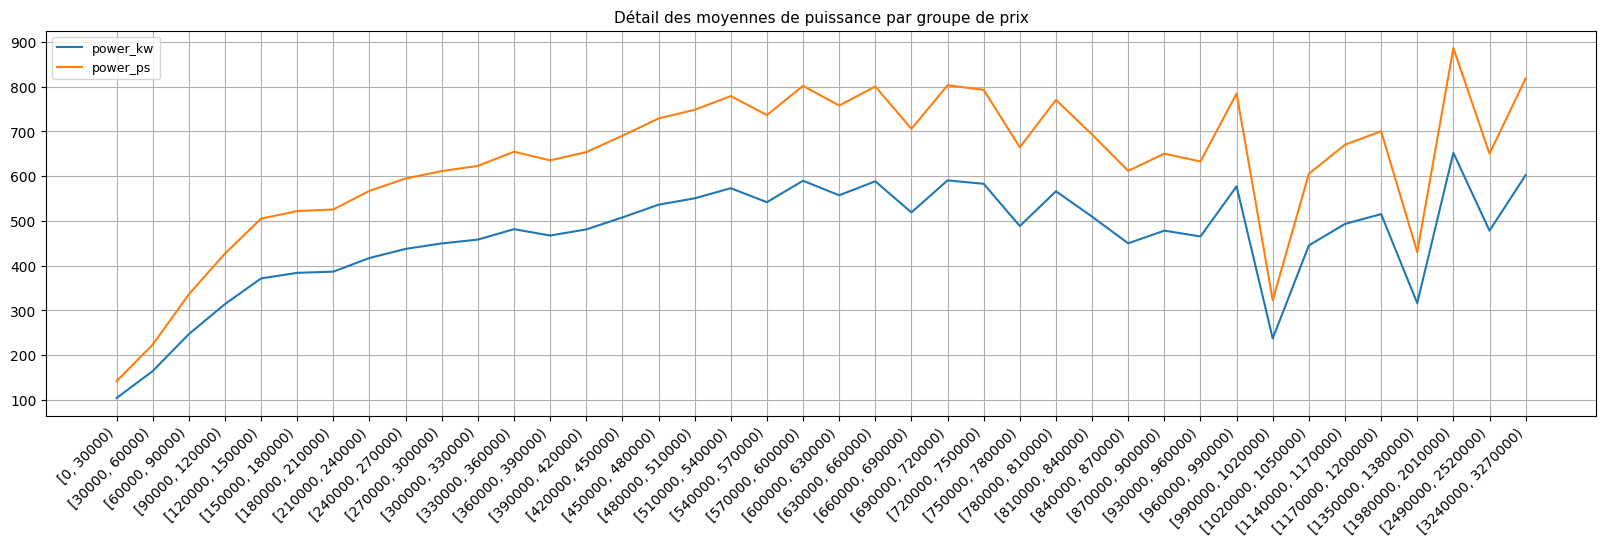

In [29]:
variables_cars_bis = ['power_kw',	'power_ps']

plt.figure(figsize = (20,5))

for colonne in variables_cars_bis:
  plt.plot(moy_par_grpe_prix[colonne].index.astype(str), moy_par_grpe_prix[colonne].values, label = colonne)
plt.title('Détail des moyennes de puissance par groupe de prix', fontsize = 11)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(fontsize = 9)
plt.grid()

plt.show()

La puissance des véhicules suit un peu la même logique que celle des consommations (cf point consommation).
A noter que le reste de l'étude se basera sur 'power_kw' étant donné que les deux types de puissance suivent la même logique.

### Consommation et prix

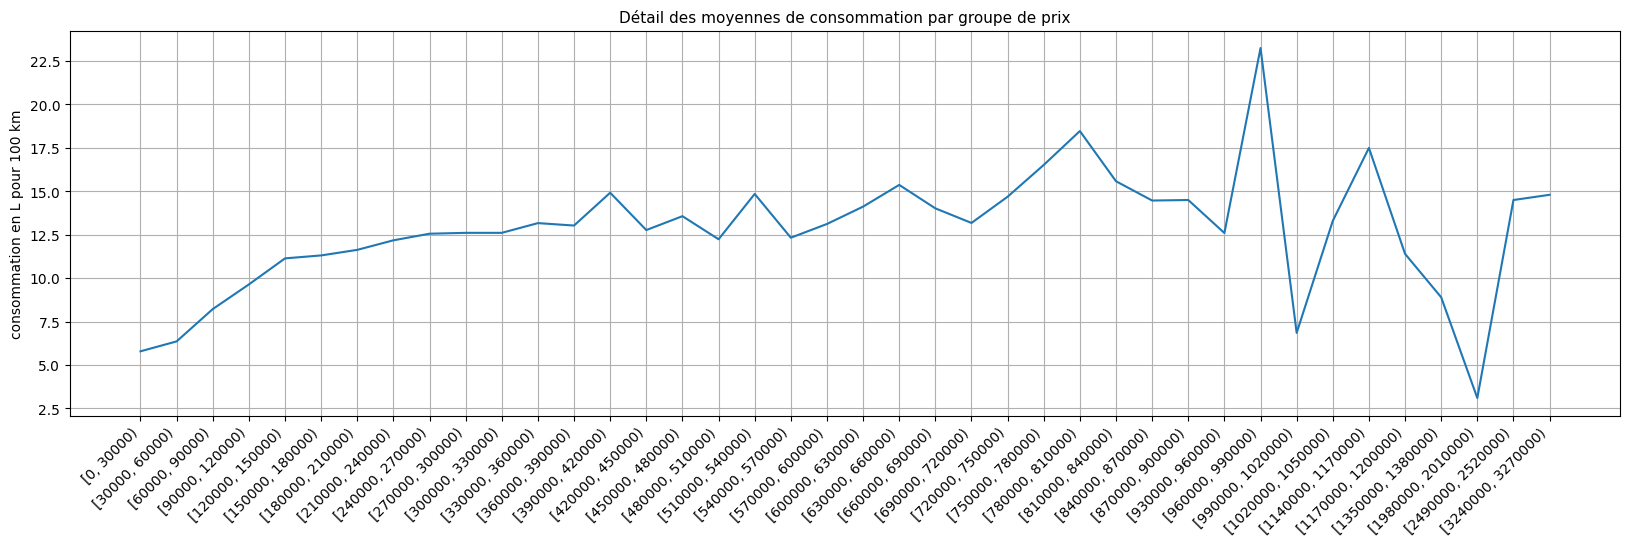

In [30]:
variables_cars_ter = ['fuel_consumption_l_100km']

plt.figure(figsize = (20,5))

for colonne in variables_cars_ter:
  plt.plot(moy_par_grpe_prix[colonne].index.astype(str), moy_par_grpe_prix[colonne].values, label = colonne)
plt.title('Détail des moyennes de consommation par groupe de prix', fontsize = 11)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('consommation en L pour 100 km')
plt.grid()

plt.show()

Les prix augmentent significativement avec la consommation jusqu'à des valeurs de 390 000 euros. Au dessus de ce prix les consommations moyennes oscille entre 12 et 18 L / 100 km, jusqu'à des prix d'environ 1 M d'euros ou les consommations sont plus dispersées, entre 6 et 14 L / 100 km. Les consommations moyennes baissent même en dessous de 4 L / 100 km pour des véhicules de près de 2 M d'euros. En conclusion, à partir d'une certaine valeur, les consommations ne reflètent pas la valeur de la voiture, certains modèles sont certainement très consommateurs car très puissants mais restent des produits de luxe.

### Kilométrage et prix

In [31]:
moyennes_par_kilometrage = df_cars_c.groupby(groupe_prix_eu)['mileage_in_km'].mean()

moyennes_par_kilometrage

price_in_euro
[0, 30000)            102546.940905
[30000, 60000)         42367.337746
[60000, 90000)         37376.179817
[90000, 120000)        35020.384058
[120000, 150000)       30329.979570
                          ...      
[3120000, 3150000)              NaN
[3150000, 3180000)              NaN
[3180000, 3210000)              NaN
[3210000, 3240000)              NaN
[3240000, 3270000)       177.000000
Name: mileage_in_km, Length: 109, dtype: float64

In [32]:
moy_par_kilometrage = moyennes_par_kilometrage.dropna()

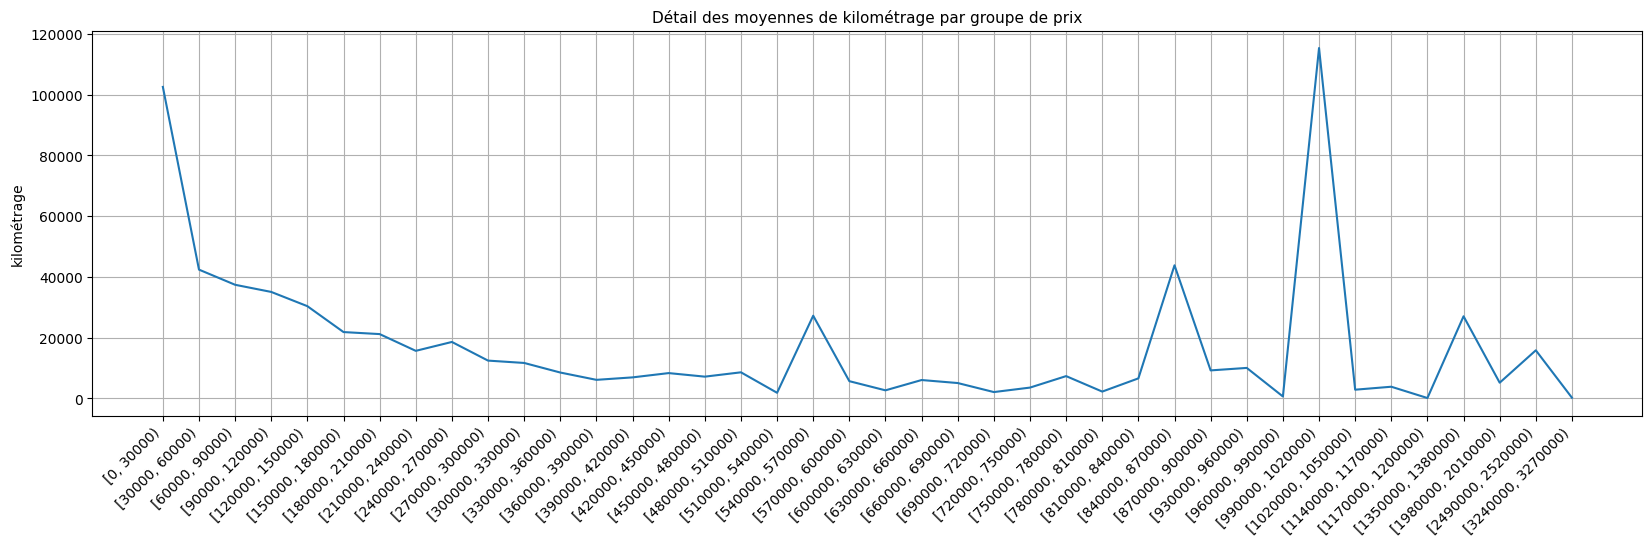

In [33]:
plt.figure(figsize = (20,5))

plt.plot(moy_par_kilometrage.index.astype(str), moy_par_kilometrage.values, label = colonne)
plt.title('Détail des moyennes de kilométrage par groupe de prix', fontsize = 11)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('kilométrage')
plt.grid()

plt.show()

Le prix dépend en partie du kilométrage, cependant à partir d'une certaine tranche de prix, le nombre de kilomètres n'est plus significatif. En effet, on constate qu'il y a des pics de km au compteur pour des valeurs situées dans les tranches supérieures à 550 000 euros, 810 000 euros, et 1 M d'euros et au-delà.
On peut en déduire que la valeur de certaines voitures n'est pas impactée par leur kilométrage, donc que certains produits sont rares sur le marché et recherchés par les connaisseurs et / ou que certains modèles sont plus qualitatifs que d'autres.

## Caractéristiques des modèles

In [23]:
df_cars_model = df_cars_c.groupby(['model', 'brand', 'year', 'color', 'power_kw', 'power_ps', 'price_in_euro', 'fuel_consumption_l_100km', 'transmission_type', 'fuel_type']).value_counts().reset_index()
df_cars_model = df_cars_model.rename(columns = {'count' : 'quantity_available'})
df_cars_model = df_cars_model.sort_values(by = 'quantity_available', ascending = False)
df_cars_model

,model,brand,year,color,power_kw,power_ps,price_in_euro,fuel_consumption_l_100km,transmission_type,fuel_type,registration_date,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
57052,Ford Ranger,ford,2023,white,151,205,44390,8.8,Automatic,Diesel,06/2023,230 g/km,10.0,Wildtrak 2.0 *NEUES MODELL*NAVI*CAM*LED*,27
43662,Fiat 500X,fiat,2023,white,96,131,29989,5.9,Automatic,Petrol,02/2023,134 g/km,10.0,MY22 PIU Dolcevita Hybrid 1.5 AUTOMATIK,26
43299,Fiat 500C,fiat,2022,blue,52,71,21190,4.8,Manual,Hybrid,07/2022,109 g/km,99.0,1.0 GSE HYBRID DOLCEVITA PDC NAVI KLIMAAUTOMATIK,22
43298,Fiat 500C,fiat,2022,blue,52,71,20990,4.8,Manual,Hybrid,07/2022,109 g/km,99.0,1.0 GSE HYBRID DOLCEVITA PDC NAVI KLIMAAUTOMATIK,19
40803,Dacia Sandero,dacia,2023,white,67,91,17445,4.9,Manual,LPG,04/2023,113 g/km,10.0,Stepway TCe100 ECO-G LPG/PARKP/8DISPLAY,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65563,Jaguar F-Pace,jaguar,2019,white,184,250,35880,7.6,Automatic,Petrol,04/2019,172 g/km,75000.0,F-PACE R-Sport AWD Digi-Tacho Soundsystem,1
65564,Jaguar F-Pace,jaguar,2019,white,221,300,36885,6.4,Automatic,Diesel,04/2019,170 g/km,48900.0,"F-PACE 30D AWD R-DYNAMIC*LED*ACC*BLACK PACK*19""*",1
65565,Jaguar F-Pace,jaguar,2019,white,221,300,40790,6.3,Automatic,Diesel,12/2019,166 g/km,56911.0,"F-PACE 30d R-Sport 19"" ACC Pano BlackP el.Heckkl",1
65566,Jaguar F-Pace,jaguar,2019,white,221,300,40990,6.3,Automatic,Diesel,06/2019,166 g/km,61000.0,F-PACE 30d Prestige AWD BlackPack Headup Pano AH,1


**Comparaison entre df_cars_c et df_cars_model pour vérification du filtre**

In [35]:
df_cars_c[(df_cars_c['model'] == 'Ford Ranger') & (df_cars_c['price_in_euro'] == 44390)].value_counts()

brand  model        color  registration_date  year  price_in_euro  power_kw  power_ps  transmission_type  fuel_type  fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  offer_description                       
ford   Ford Ranger  white  06/2023            2023  44390          151.0     205.0     Automatic          Diesel     8.8                       230 g/km               10             Wildtrak 2.0 *NEUES MODELL*NAVI*CAM*LED*    27
Name: count, dtype: int64

In [36]:
df_cars_model[(df_cars_model['model'] == 'Ford Ranger') &
              (df_cars_model['color'] == 'white') &
              (df_cars_model['transmission_type'] == 'Automatic') &
              (df_cars_model['fuel_type'] == 'Diesel') &
              (df_cars_model['price_in_euro'] == 44390) &
              (df_cars_model['year'] == 2023)]

,model,brand,year,color,power_kw,power_ps,price_in_euro,fuel_consumption_l_100km,transmission_type,fuel_type,registration_date,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
57052,Ford Ranger,ford,2023,white,151.0,205.0,44390,8.8,Automatic,Diesel,06/2023,230 g/km,10,Wildtrak 2.0 *NEUES MODELL*NAVI*CAM*LED*,27


In [37]:
df_cars_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194610 entries, 57052 to 194609
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     194610 non-null  object 
 1   brand                     194610 non-null  object 
 2   year                      194610 non-null  int32  
 3   color                     194610 non-null  object 
 4   power_kw                  194610 non-null  float64
 5   power_ps                  194610 non-null  float64
 6   price_in_euro             194610 non-null  int32  
 7   fuel_consumption_l_100km  194610 non-null  float64
 8   transmission_type         194610 non-null  object 
 9   fuel_type                 194610 non-null  object 
 10  registration_date         194610 non-null  object 
 11  fuel_consumption_g_km     194610 non-null  object 
 12  mileage_in_km             194610 non-null  int32  
 13  offer_description         194610 non-null  ob

In [38]:
for index, row in df_cars_model.iterrows():
    if row['quantity_available'] > 1:
        print(f"Index : {index}, Modèle : {row['model']}, Quantité disponible : {row['quantity_available']}")

Index : 57052, Modèle : Ford Ranger, Quantité disponible : 27
Index : 43662, Modèle : Fiat 500X, Quantité disponible : 26
Index : 43299, Modèle : Fiat 500C, Quantité disponible : 22
Index : 43298, Modèle : Fiat 500C, Quantité disponible : 19
Index : 40803, Modèle : Dacia Sandero, Quantité disponible : 17
Index : 40806, Modèle : Dacia Sandero, Quantité disponible : 16
Index : 159530, Modèle : Toyota C-HR, Quantité disponible : 16
Index : 59267, Modèle : Ford Transit Custom, Quantité disponible : 14
Index : 42694, Modèle : Fiat 500, Quantité disponible : 14
Index : 111613, Modèle : Opel Astra, Quantité disponible : 13
Index : 42833, Modèle : Fiat 500, Quantité disponible : 12
Index : 163107, Modèle : Toyota Yaris, Quantité disponible : 12
Index : 42689, Modèle : Fiat 500, Quantité disponible : 12
Index : 163052, Modèle : Toyota Yaris, Quantité disponible : 12
Index : 65131, Modèle : Isuzu D-Max, Quantité disponible : 12
Index : 163336, Modèle : Toyota Yaris Cross, Quantité disponible : 1

In [39]:
df_cars_model[df_cars_model['model'] == 'Fiat 500X']

,model,brand,year,color,power_kw,power_ps,price_in_euro,fuel_consumption_l_100km,transmission_type,fuel_type,registration_date,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
43662,Fiat 500X,fiat,2023,white,96.0,131.0,29989,5.9,Automatic,Petrol,02/2023,134 g/km,10,MY22 PIU Dolcevita Hybrid 1.5 AUTOMATIK,26
43663,Fiat 500X,fiat,2023,white,96.0,131.0,29989,5.9,Automatic,Petrol,03/2023,134 g/km,10,MY22 PIU Dolcevita Hybrid 1.5 AUTOMATIK,5
43602,Fiat 500X,fiat,2022,blue,110.0,150.0,22788,6.3,Automatic,Petrol,09/2022,151 g/km,10,1.3 GSE 150 DCT City Cross SHZ PDC Temp 16Z,5
43651,Fiat 500X,fiat,2023,red,96.0,131.0,29390,5.9,Automatic,Hybrid,03/2023,133 g/km,10,Sport 1.5 Hybrid DCT *Sofort Verfügbar*,4
43650,Fiat 500X,fiat,2023,red,96.0,131.0,27990,6.2,Automatic,Petrol,02/2023,139 g/km,5,CROSS 1.5 MHEV ''KAMERA''SHZ''NAVIGATION'',3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43598,Fiat 500X,fiat,2021,grey,96.0,131.0,22990,4.7,Manual,Diesel,06/2021,125 g/km,38415,Google 1.6 MultiJet 130PS,1
43599,Fiat 500X,fiat,2022,beige,110.0,150.0,27990,5.9,Automatic,Petrol,03/2022,135 g/km,7500,DOLCEVITA SPORT 1.3 Turbo Benzin DCT,1
43600,Fiat 500X,fiat,2022,blue,88.0,120.0,25990,5.9,Manual,Petrol,11/2022,135 g/km,10,1.0 CROSS /MAGIC EYE PA/RFK/KLIMA-A/SOFORT,1
43601,Fiat 500X,fiat,2022,blue,96.0,131.0,26990,5.9,Automatic,Petrol,10/2022,149 g/km,0,Cross 1.5 Hybrid Klimaaut. Navi 18 Zoll,1


Manque de Ram sur Collab, transfert du fichier nettoyé en csv : 

In [40]:
df_cars_model.to_csv('cars_models.csv', index = False)

## Recherche rapide d'un modèle de véhicule

In [41]:
def filtrage(df):
  print('Veuillez saisir les caractéristiques souhaitées : \n')

  choix_modele = str(input('Entrez le nom d\'un modèle : '))
  choix_couleur = str(input('Entrez la couleur : '))
  choix_annee_min = int(input('Entrez l\'année minimale de fabrication : ') or 0)
  choix_prix_max = int(input('Entrez le prix maximal en euros : '))
  choix_transmission = input('Entrez le type de transmission (Automatic, Manual ou Semi-automatic) : ')
  choix_type_carburant = input('Entrez le type de carburant (Petrol, Diesel, Hybrid, LPG, Diesel Hybrid, CNG, Ethanol ou Other) : ')
  choix_kilometrage_max = int(input('Entrez le kilométrage maximal en km : '))

  filtered_df = df[
        (df['model'].str.contains(choix_modele, case = False, na = False)) &
        (df['color'].str.contains(choix_couleur, case = False, na = False)) &
        (df['year'].between(choix_annee_min, df['year'].max())) &
        (df['price_in_euro'].between(df['price_in_euro'].min(), choix_prix_max)) &
        (df['transmission_type'].str.contains(choix_transmission, case = False, na = False)) &
        (df['fuel_type'].str.contains(choix_type_carburant, case = False, na = False)) &
        (df['mileage_in_km'].between(df['mileage_in_km'].min(), choix_kilometrage_max))
    ]

  return filtered_df

df_filtered = filtrage(df_cars_model)
print('\n')
df_filtered

Veuillez saisir les caractéristiques souhaitées : 



### Caractéristiques des véhicules de luxe (tarifs supérieurs à 1 M €) :

In [24]:
df_model_luxe = df_cars_model[df_cars_model['price_in_euro'] > 1000000]
df_model_luxe

,model,brand,year,color,power_kw,power_ps,price_in_euro,fuel_consumption_l_100km,transmission_type,fuel_type,registration_date,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
128347,Porsche 991,porsche,2015,white,316,430,1350000,8.9,Automatic,Petrol,01/2015,207 g/km,27000.0,Carrera GTS Cabrio nur 27.000km Komfortpaket,1
128249,Porsche 918,porsche,2014,white,652,886,1990000,3.1,Automatic,Hybrid,06/2014,72 g/km,5125.0,Spyder WEISSACH PAKET MAGNESIUM FELGEN,1
101938,Mercedes-Benz SLR,mercedes-benz,2007,grey,478,650,2490000,14.5,Automatic,Petrol,01/2007,348 g/km,15793.0,722 MSO McLaren Edition 1 of 25 worldwide Nr.12,1
30193,BMW 550,bmw,2018,brown,294,400,1010101,6.3,Automatic,Diesel,07/2018,165 g/km,87000.0,M550d xDrive Touring Aut.(Hagelschaden!!!) VB!!!,1
41374,Ferrari 599,ferrari,2011,red,493,670,1150000,17.5,Automatic,Petrol,04/2011,411 g/km,3800.0,GTO * German delivery * rare color *,1
41300,Ferrari 458,ferrari,2015,blue,445,605,1045800,13.3,Automatic,Petrol,07/2015,307 g/km,2824.0,Speciale Aperta |Tour de France| 878.824€ n.,1
1301,Aston Martin Vantage,aston-martin,2022,blue,515,700,1170000,11.4,Automatic,Petrol,06/2022,298 g/km,80.0,V12 Speedster 1 of 88,1
71694,Lamborghini,lamborghini,2021,black,602,818,3250000,14.8,Automatic,Hybrid,11/2021,373 g/km,177.0,Sian,1


In [ ]:
df_model_luxe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 128347 to 71694
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     8 non-null      object 
 1   brand                     8 non-null      object 
 2   year                      8 non-null      int32  
 3   color                     8 non-null      object 
 4   power_kw                  8 non-null      int32  
 5   power_ps                  8 non-null      int32  
 6   price_in_euro             8 non-null      int32  
 7   fuel_consumption_l_100km  8 non-null      float64
 8   transmission_type         8 non-null      object 
 9   fuel_type                 8 non-null      object 
 10  registration_date         8 non-null      object 
 11  fuel_consumption_g_km     8 non-null      object 
 12  mileage_in_km             8 non-null      int32  
 13  offer_description         8 non-null      object 
 14  quantity_a

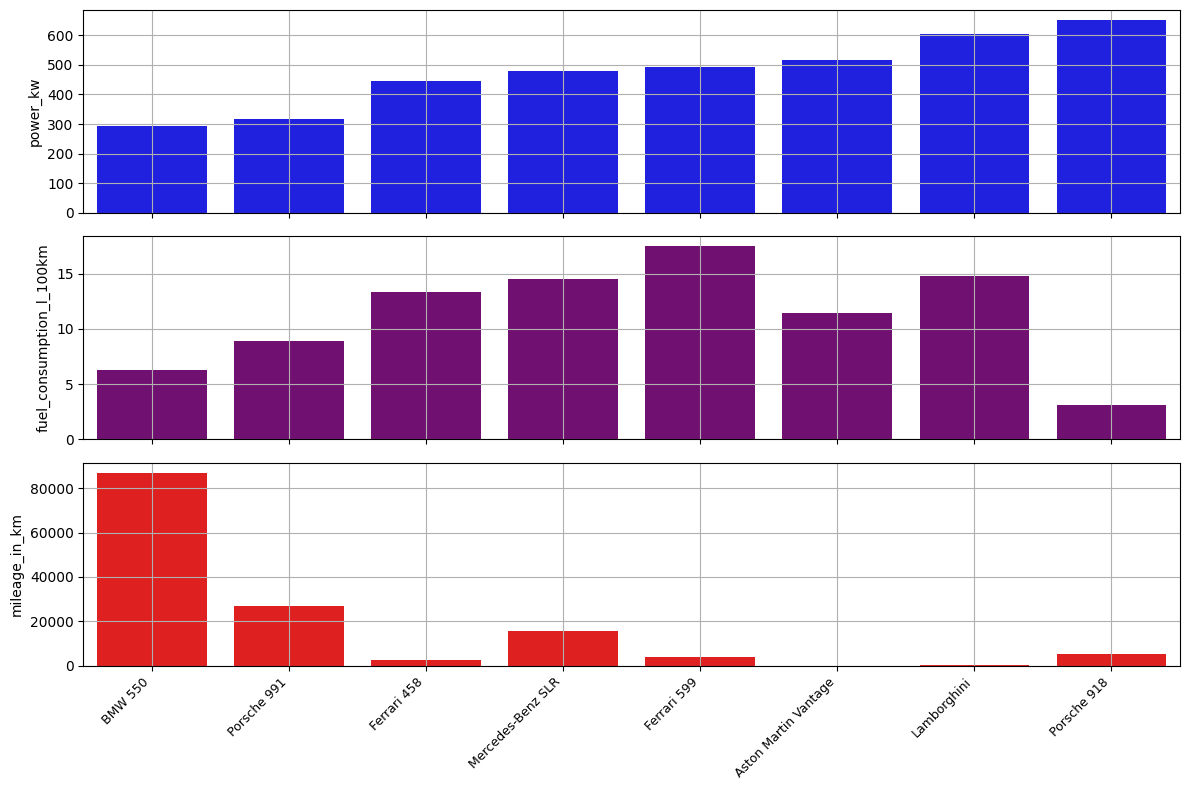


Caractéristiques des modèles de la sélection :



,model,year,price_in_euro,transmission_type,fuel_type,fuel_consumption_g_km,color,power_kw,fuel_consumption_l_100km,mileage_in_km
128347,Porsche 991,2015,1350000,Automatic,Petrol,207 g/km,white,316,8.9,27000.0
128249,Porsche 918,2014,1990000,Automatic,Hybrid,72 g/km,white,652,3.1,5125.0
101938,Mercedes-Benz SLR,2007,2490000,Automatic,Petrol,348 g/km,grey,478,14.5,15793.0
30193,BMW 550,2018,1010101,Automatic,Diesel,165 g/km,brown,294,6.3,87000.0
41374,Ferrari 599,2011,1150000,Automatic,Petrol,411 g/km,red,493,17.5,3800.0
41300,Ferrari 458,2015,1045800,Automatic,Petrol,307 g/km,blue,445,13.3,2824.0
1301,Aston Martin Vantage,2022,1170000,Automatic,Petrol,298 g/km,blue,515,11.4,80.0
71694,Lamborghini,2021,3250000,Automatic,Hybrid,373 g/km,black,602,14.8,177.0


In [26]:
colonnes_caract_num = ['power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']
colors = ['blue', 'purple', 'red']

df_model_luxe_sorted = df_model_luxe.sort_values(by= colonnes_caract_num[0])

rows = 3
cols = 1

fig, axes = plt.subplots(rows, cols, figsize = (12, 8), sharex = True)

axes = axes.flatten()

for i, col in enumerate(colonnes_caract_num):
  sns.barplot(data = df_model_luxe_sorted, x = 'model', y = col, ax = axes[i], color = colors[i])
  axes[i].grid()
  
  axes[i].set_xlabel('')
  axes[i].set_ylabel(col)

axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation = 45, ha = 'right', fontsize = 9)

plt.tight_layout()
plt.show()

print('\nCaractéristiques des modèles de la sélection :\n')
df_model_luxe[['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]


### Caractéristiques des véhicules de catégorie intermédiaires (Tarifs entre 700 000 et 1 000 000 €) :

In [27]:
df_model_int = df_cars_model[(df_cars_model['price_in_euro'] < 1000000) & (df_cars_model['price_in_euro'] > 700000)]
df_model_int.head()

,model,brand,year,color,power_kw,power_ps,price_in_euro,fuel_consumption_l_100km,transmission_type,fuel_type,registration_date,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
128186,Porsche 911,porsche,2018,silver,695,945,749000,11.8,Automatic,Petrol,07/2018,269 g/km,9858.0,991.2 GT2 RS Weissach,1
128579,Porsche 991,porsche,2018,silver,695,945,749000,11.8,Automatic,Petrol,07/2018,269 g/km,9858.0,MANHART TR 900 (991.2 GT2 RS) / 945 PS / 1070 NM,1
101937,Mercedes-Benz SLR,mercedes-benz,2007,grey,478,650,898150,14.5,Automatic,Petrol,05/2007,348 g/km,9179.0,McLaren 722 Coupe *wie neu*,1
102006,Mercedes-Benz SLS,mercedes-benz,2015,yellow,464,631,822000,13.2,Automatic,Petrol,01/2015,308 g/km,8822.0,BLACK SERIES,1
35340,Bentley Mulsanne,bentley,2020,black,377,513,761600,15.9,Automatic,Petrol,12/2020,350 g/km,19500.0,MULSANNE COUPÉ by ARES MODENA - LIMITED EDITION,1


In [ ]:
df_model_int.shape

(29, 15)

In [ ]:
# Fonction pour numéroter les modèles identiques afin qu'ils apparaissent tous indépendemment les uns des autres sur les graphiques :

def numeroter_modeles(df, colonne_modele = 'model', suffixe = ' n°'):
    counts = df[colonne_modele].value_counts()
    suffixes = df.groupby(colonne_modele).cumcount() + 1
    df[colonne_modele] = df[colonne_modele] + suffixe + suffixes.astype(str)
    return df

df_modeles_int_num = numeroter_modeles(df_model_int, colonne_modele = 'model', suffixe = ' n°')
df_modeles_int_num.head()

,model,brand,year,color,power_kw,power_ps,price_in_euro,fuel_consumption_l_100km,transmission_type,fuel_type,registration_date,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
128186,Porsche 911 n°1,porsche,2018,silver,695,945,749000,11.8,Automatic,Petrol,07/2018,269 g/km,9858,991.2 GT2 RS Weissach,1
128579,Porsche 991 n°1,porsche,2018,silver,695,945,749000,11.8,Automatic,Petrol,07/2018,269 g/km,9858,MANHART TR 900 (991.2 GT2 RS) / 945 PS / 1070 NM,1
101937,Mercedes-Benz SLR n°1,mercedes-benz,2007,grey,478,650,898150,14.5,Automatic,Petrol,05/2007,348 g/km,9179,McLaren 722 Coupe *wie neu*,1
102006,Mercedes-Benz SLS n°1,mercedes-benz,2015,yellow,464,631,822000,13.2,Automatic,Petrol,01/2015,308 g/km,8822,BLACK SERIES,1
35340,Bentley Mulsanne n°1,bentley,2020,black,377,513,761600,15.9,Automatic,Petrol,12/2020,350 g/km,19500,MULSANNE COUPÉ by ARES MODENA - LIMITED EDITION,1


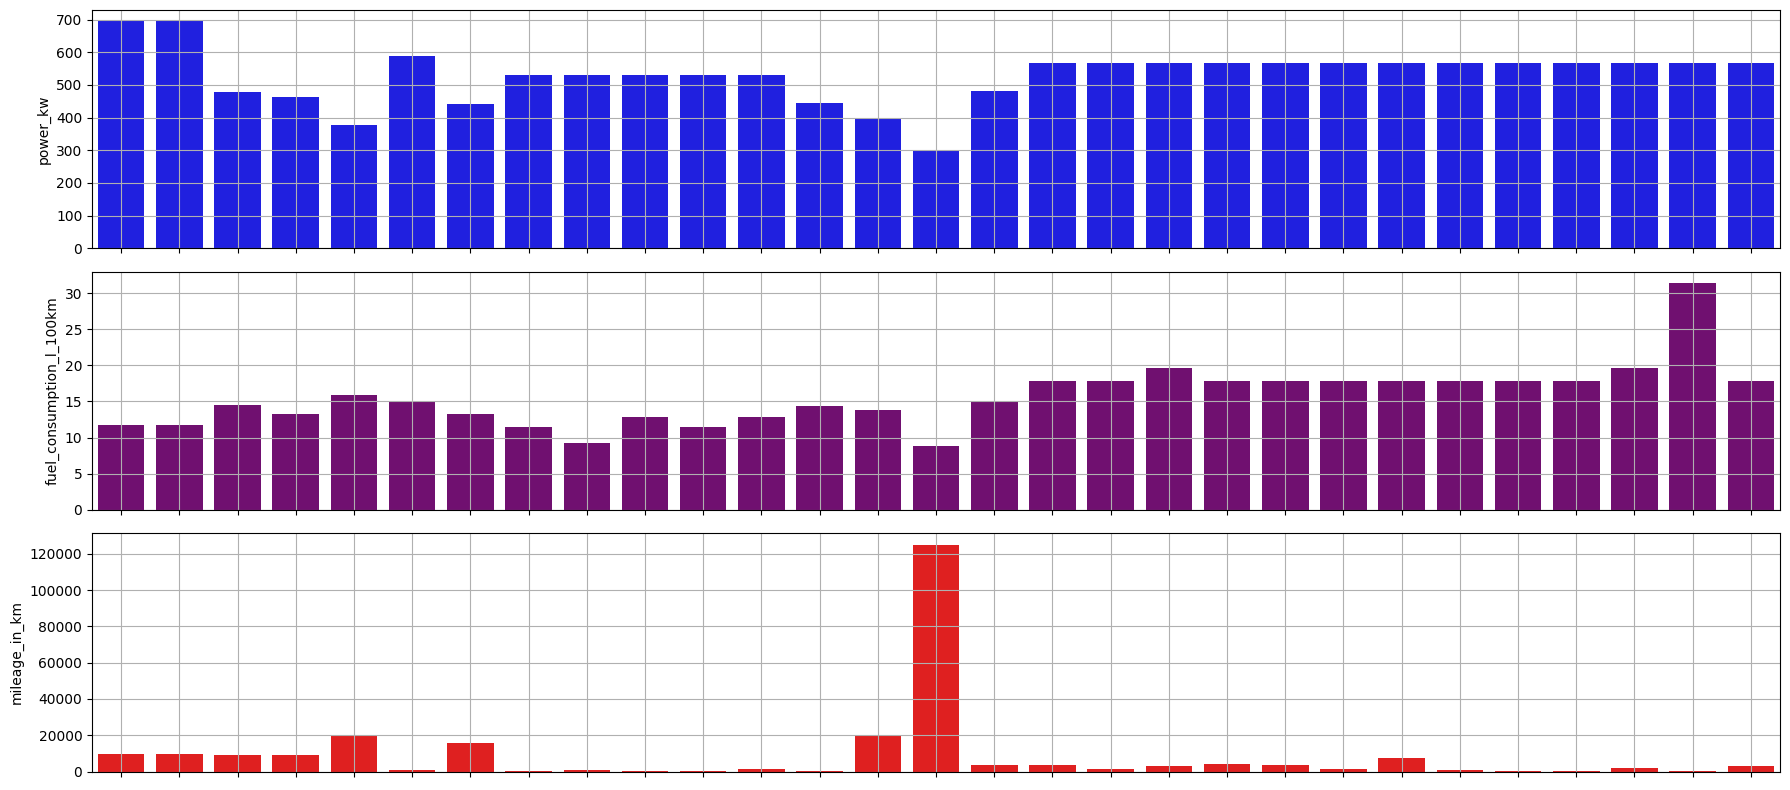


Caractéristiques des modèles de la sélection :



,model,year,price_in_euro,transmission_type,fuel_type,fuel_consumption_g_km,color,power_kw,fuel_consumption_l_100km,mileage_in_km
128186,Porsche 911 n°1,2018,749000,Automatic,Petrol,269 g/km,silver,695,11.8,9858
128579,Porsche 991 n°1,2018,749000,Automatic,Petrol,269 g/km,silver,695,11.8,9858
101937,Mercedes-Benz SLR n°1,2007,898150,Automatic,Petrol,348 g/km,grey,478,14.5,9179
102006,Mercedes-Benz SLS n°1,2015,822000,Automatic,Petrol,308 g/km,yellow,464,13.2,8822
35340,Bentley Mulsanne n°1,2020,761600,Automatic,Petrol,350 g/km,black,377,15.9,19500
41400,Ferrari 812 n°1,2022,989812,Automatic,Petrol,345 g/km,black,588,15.1,1100
41301,Ferrari 458 n°1,2015,829500,Automatic,Petrol,307 g/km,red,441,13.3,15645
41349,Ferrari 488 n°1,2020,959980,Automatic,Petrol,260 g/km,red,530,11.4,94
41351,Ferrari 488 n°2,2020,705000,Automatic,Petrol,289 g/km,yellow,530,9.3,553
41352,Ferrari 488 n°3,2021,749900,Semi-automatic,Petrol,289 g/km,black,530,12.8,168


In [ ]:
colonnes_caract_num = ['power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']
colors = ['blue', 'purple', 'red']

rows = 3
cols = 1

fig, axes = plt.subplots(rows, cols, figsize = (18, 8), sharex = True)

axes = axes.flatten()

for i, col in enumerate(colonnes_caract_num):
  sns.barplot(data = df_modeles_int_num, x = 'model', y = col, ax = axes[i], color = colors[i])
  axes[i].grid()
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45, ha = 'right', fontsize = 8.5)
  axes[i].set_xlabel('')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


print('\nCaractéristiques des modèles de la sélection :\n')
df_modeles_int_num[['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]

**Proposer le nom d'un modèle afin de faciliter la comparaison lorsque plusieurs véhicules sont disponibles :**

In [ ]:
choix_modele = str(input('Entrez le nom d\'un modèle: \n'))
df_modeles_int_num[df_modeles_int_num['model'].str.contains(choix_modele, case = False)]\
 [['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]

### Caractéristiques des véhicules de catégorie intermédiaires (Tarifs entre 500 000 et 700 000 €) :

In [ ]:
df_model_inf_700 = df_cars_model[(df_cars_model['price_in_euro'] < 700000) & (df_cars_model['price_in_euro'] > 500000)]
df_model_inf_700.head()

,model,brand,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
41533,Ferrari SF90 Spider,ferrari,blue,07/2021,2021,699980,735.0,999.0,Automatic,Hybrid,12.3,280 g/km,2332,*Ferrari-Dresden*,1
41341,Ferrari 488,ferrari,grey,09/2019,2019,699000,530.0,721.0,Automatic,Petrol,11.5,263 g/km,2438,Pista *Spider*Sonderanfertigung*Karbon*,1
71739,Lamborghini Aventador,lamborghini,yellow,03/2021,2021,690000,566.0,770.0,Automatic,Petrol,19.6,452 g/km,2850,SVJ LP770-4,1
128173,Porsche 911,porsche,blue,10/2018,2018,689000,515.0,700.0,Automatic,Petrol,11.8,269 g/km,133,GT2 RS Weissach no OPF,1
71741,Lamborghini Aventador,lamborghini,yellow,07/2019,2019,679900,566.0,770.0,Automatic,Petrol,19.6,452 g/km,2850,SVJ Coupe LP770-4,1


In [ ]:
df_model_inf_700.shape

(41, 15)

In [ ]:
# Fonction pour numéroter les modèles identiques afin qu'ils apparaissent tous indépendemment les uns des autres sur les graphiques :

df_modeles_inf700_num = numeroter_modeles(df_model_inf_700, colonne_modele = 'model', suffixe = ' n°')
df_modeles_inf700_num.head()

,model,brand,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
41533,Ferrari SF90 Spider n°1,ferrari,blue,07/2021,2021,699980,735.0,999.0,Automatic,Hybrid,12.3,280 g/km,2332,*Ferrari-Dresden*,1
41341,Ferrari 488 n°1,ferrari,grey,09/2019,2019,699000,530.0,721.0,Automatic,Petrol,11.5,263 g/km,2438,Pista *Spider*Sonderanfertigung*Karbon*,1
71739,Lamborghini Aventador n°1,lamborghini,yellow,03/2021,2021,690000,566.0,770.0,Automatic,Petrol,19.6,452 g/km,2850,SVJ LP770-4,1
128173,Porsche 911 n°1,porsche,blue,10/2018,2018,689000,515.0,700.0,Automatic,Petrol,11.8,269 g/km,133,GT2 RS Weissach no OPF,1
71741,Lamborghini Aventador n°2,lamborghini,yellow,07/2019,2019,679900,566.0,770.0,Automatic,Petrol,19.6,452 g/km,2850,SVJ Coupe LP770-4,1


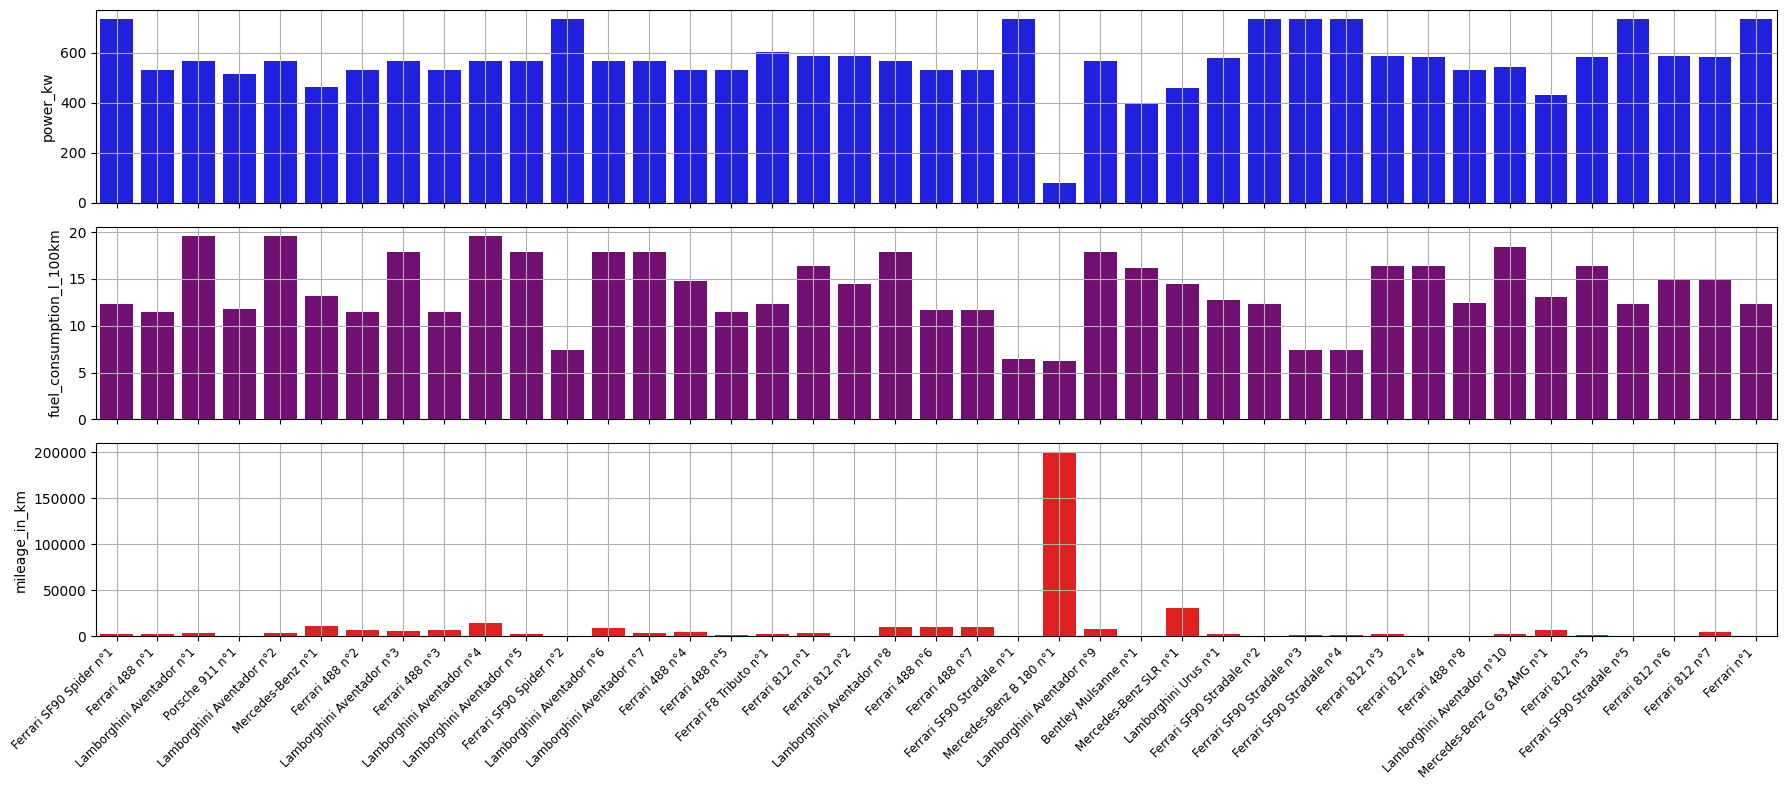


Caractéristiques des modèles de la sélection :



,model,year,price_in_euro,transmission_type,fuel_type,fuel_consumption_g_km,color,power_kw,fuel_consumption_l_100km,mileage_in_km
41533,Ferrari SF90 Spider n°1,2021,699980,Automatic,Hybrid,280 g/km,blue,735.0,12.3,2332
41341,Ferrari 488 n°1,2019,699000,Automatic,Petrol,263 g/km,grey,530.0,11.5,2438
71739,Lamborghini Aventador n°1,2021,690000,Automatic,Petrol,452 g/km,yellow,566.0,19.6,2850
128173,Porsche 911 n°1,2018,689000,Automatic,Petrol,269 g/km,blue,515.0,11.8,133
71741,Lamborghini Aventador n°2,2019,679900,Automatic,Petrol,452 g/km,yellow,566.0,19.6,2850
81882,Mercedes-Benz n°1,2014,669990,Automatic,Petrol,308 g/km,silver,464.0,13.2,10535
41339,Ferrari 488 n°2,2019,669000,Automatic,Petrol,263 g/km,grey,530.0,11.5,6549
71706,Lamborghini Aventador n°3,2019,659800,Automatic,Petrol,486 g/km,blue,566.0,17.9,5750
41344,Ferrari 488 n°3,2020,659000,Automatic,Petrol,263 g/km,grey,530.0,11.5,6220
71718,Lamborghini Aventador n°4,2021,649900,Automatic,Petrol,452 g/km,black,566.0,19.6,13800


In [ ]:
colonnes_caract_num = ['power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']
colors = ['blue', 'purple', 'red']

rows = 3
cols = 1

fig, axes = plt.subplots(rows, cols, figsize = (18, 8), sharex = True)

axes = axes.flatten()

for i, col in enumerate(colonnes_caract_num):
  sns.barplot(data = df_modeles_inf700_num, x = 'model', y = col, ax = axes[i], color = colors[i])
  axes[i].grid()
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45, ha = 'right', fontsize = 8.5)
  axes[i].set_xlabel('')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


print('\nCaractéristiques des modèles de la sélection :\n')
df_modeles_inf700_num[['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]

**Proposer le nom d'un modèle afin de faciliter la comparaison lorsque plusieurs véhicules sont disponibles :**

In [ ]:
choix_modele = str(input('Entrez le nom d\'un modèle: \n'))
df_modeles_inf700_num[df_modeles_inf700_num['model'].str.contains(choix_modele, case = False)]\
 [['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]

Entrez le nom d'un modèle: 
sf90


,model,year,price_in_euro,transmission_type,fuel_type,fuel_consumption_g_km,color,power_kw,fuel_consumption_l_100km,mileage_in_km
41533,Ferrari SF90 Spider n°1,2021,699980,Automatic,Hybrid,280 g/km,blue,735.0,12.3,2332
41532,Ferrari SF90 Spider n°2,2023,645900,Automatic,Hybrid,205 g/km,red,735.0,7.4,85
41534,Ferrari SF90 Stradale n°1,2022,575900,Automatic,Petrol,169 g/km,black,735.0,6.5,400
41539,Ferrari SF90 Stradale n°2,2023,549980,Automatic,Hybrid,280 g/km,red,735.0,12.3,95
41535,Ferrari SF90 Stradale n°3,2021,549900,Automatic,Hybrid,330 g/km,black,735.0,7.4,1000
41537,Ferrari SF90 Stradale n°4,2021,549900,Automatic,Hybrid,330 g/km,grey,735.0,7.4,1000
41538,Ferrari SF90 Stradale n°5,2022,520000,Automatic,Hybrid,154 g/km,red,735.0,12.3,80


### Caractéristiques des véhicules de catégorie intermédiaires (Tarifs entre 450 000 et 500 000 €) :

In [ ]:
df_model_inf500 = df_cars_model[(df_cars_model['price_in_euro'] < 500000) & (df_cars_model['price_in_euro'] > 450000)]
df_model_inf500.head()

,model,brand,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
71885,Lamborghini Urus,lamborghini,grey,09/2021,2021,499999,580.0,789.0,Automatic,Petrol,12.7,325 g/km,8674,NovitecEsteso GUCCI Edition VollCarbon 1of1,1
41324,Ferrari 488,ferrari,silver,08/2019,2019,499990,530.0,721.0,Automatic,Petrol,12.3,282 g/km,4500,Full Carbon + PPF + Lift + Race seats,1
71854,Lamborghini Urus,lamborghini,black,03/2023,2023,499900,490.0,666.0,Automatic,Petrol,14.1,281 g/km,80,"4.0 V8 Performante 23"" Carbon Bang&Olufsen",1
128622,Porsche 991,porsche,grey,09/2018,2018,499000,515.0,700.0,Automatic,Petrol,11.8,269 g/km,9018,911 991 GT2 RS Clubsport Weissach Grigio Telesto,1
41357,Ferrari 512,ferrari,red,05/1996,1996,499000,324.0,441.0,Manual,Petrol,9.9,- (g/km),30085,M,1


In [ ]:
df_model_inf500.shape

(39, 15)

In [ ]:
# Fonction pour numéroter les modèles identiques afin qu'ils apparaissent tous indépendemment les uns des autres sur les graphiques :

df_modeles_inf500_num = numeroter_modeles(df_model_inf500, colonne_modele = 'model', suffixe = ' n°')
df_modeles_inf500_num.head()

,model,brand,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,quantity_available
71885,Lamborghini Urus n°1,lamborghini,grey,09/2021,2021,499999,580.0,789.0,Automatic,Petrol,12.7,325 g/km,8674,NovitecEsteso GUCCI Edition VollCarbon 1of1,1
41324,Ferrari 488 n°1,ferrari,silver,08/2019,2019,499990,530.0,721.0,Automatic,Petrol,12.3,282 g/km,4500,Full Carbon + PPF + Lift + Race seats,1
71854,Lamborghini Urus n°2,lamborghini,black,03/2023,2023,499900,490.0,666.0,Automatic,Petrol,14.1,281 g/km,80,"4.0 V8 Performante 23"" Carbon Bang&Olufsen",1
128622,Porsche 991 n°1,porsche,grey,09/2018,2018,499000,515.0,700.0,Automatic,Petrol,11.8,269 g/km,9018,911 991 GT2 RS Clubsport Weissach Grigio Telesto,1
41357,Ferrari 512 n°1,ferrari,red,05/1996,1996,499000,324.0,441.0,Manual,Petrol,9.9,- (g/km),30085,M,1


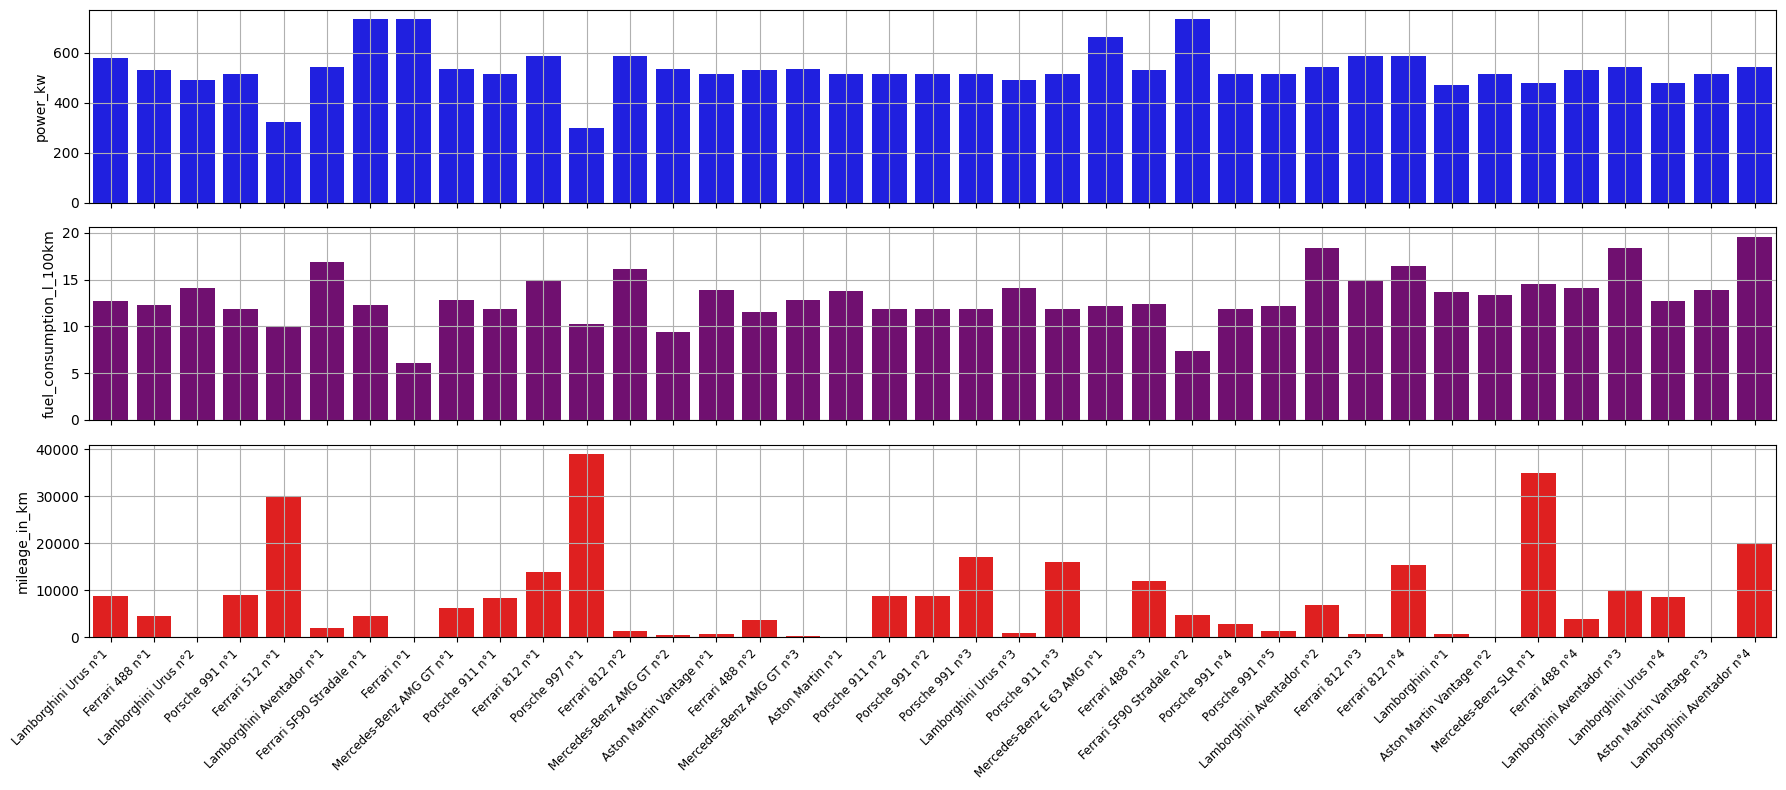


Caractéristiques des modèles de la sélection :



,model,year,price_in_euro,transmission_type,fuel_type,fuel_consumption_g_km,color,power_kw,fuel_consumption_l_100km,mileage_in_km
71885,Lamborghini Urus n°1,2021.0,499999,Automatic,Petrol,325 g/km,grey,580.0,12.7,8674
41324,Ferrari 488 n°1,2019.0,499990,Automatic,Petrol,282 g/km,silver,530.0,12.3,4500
71854,Lamborghini Urus n°2,2023.0,499900,Automatic,Petrol,281 g/km,black,490.0,14.1,80
128622,Porsche 991 n°1,2018.0,499000,Automatic,Petrol,269 g/km,grey,515.0,11.8,9018
41357,Ferrari 512 n°1,1996.0,499000,Manual,Petrol,- (g/km),red,324.0,9.9,30085
71717,Lamborghini Aventador n°1,2018.0,499000,Manual,Petrol,394 g/km,grey,544.0,16.9,1909
41540,Ferrari SF90 Stradale n°1,2022.0,495000,Unknown,Hybrid,280 g/km,yellow,735.0,12.3,4500
41256,Ferrari n°1,2023.0,495000,Automatic,Hybrid,154 g/km,black,735.0,6.1,89
84753,Mercedes-Benz AMG GT n°1,2022.0,494000,Automatic,Petrol,292 g/km,orange,537.0,12.8,6300
128165,Porsche 911 n°1,2018.0,489990,Automatic,Petrol,269 g/km,grey,515.0,11.8,8320


In [ ]:
colonnes_caract_num = ['power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']
colors = ['blue', 'purple', 'red']

rows = 3
cols = 1

fig, axes = plt.subplots(rows, cols, figsize = (18, 8), sharex = True)

axes = axes.flatten()

for i, col in enumerate(colonnes_caract_num):
  sns.barplot(data = df_modeles_inf500_num, x = 'model', y = col, ax = axes[i], color = colors[i])
  axes[i].grid()
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45, ha = 'right', fontsize = 8.5)
  axes[i].set_xlabel('')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


print('\nCaractéristiques des modèles de la sélection :\n')
df_modeles_inf500_num[['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]

**Proposer le nom d'un modèle afin de faciliter la comparaison lorsque plusieurs véhicules sont disponibles :**

In [ ]:
choix_modele = str(input('Entrez le nom d\'un modèle: \n'))
df_modeles_inf500_num[df_modeles_inf500_num['model'].str.contains(choix_modele, case = False)]\
 [['model', 'year', 'price_in_euro', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 'color', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']]

Entrez le nom d'un modèle: 
porsche


,model,year,price_in_euro,transmission_type,fuel_type,fuel_consumption_g_km,color,power_kw,fuel_consumption_l_100km,mileage_in_km
128622,Porsche 991 n°1,2018,499000,Automatic,Petrol,269 g/km,grey,515.0,11.8,9018
128165,Porsche 911 n°1,2018,489990,Automatic,Petrol,269 g/km,grey,515.0,11.8,8320
128874,Porsche 997 n°1,2011,489356,Automatic,Petrol,240 g/km,black,300.0,10.2,39000
128118,Porsche 911 n°2,2018,475000,Automatic,Petrol,269 g/km,red,515.0,11.8,8864
128614,Porsche 991 n°2,2018,475000,Automatic,Petrol,269 g/km,red,515.0,11.8,8864
128528,Porsche 991 n°3,2018,474991,Automatic,Petrol,269 g/km,white,515.0,11.8,16990
128102,Porsche 911 n°3,2018,474900,Automatic,Petrol,269 g/km,silver,515.0,11.8,16100
128494,Porsche 991 n°4,2018,469000,Automatic,Petrol,269 g/km,silver,515.0,11.8,2800
128290,Porsche 991 n°5,2018,469000,Automatic,Petrol,269 g/km,white,515.0,12.2,1390


## Classification

In [ ]:
df_cars_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194610 entries, 71693 to 178683
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     194610 non-null  object 
 1   brand                     194610 non-null  object 
 2   color                     194610 non-null  object 
 3   registration_date         194610 non-null  object 
 4   year                      194610 non-null  int64  
 5   price_in_euro             194610 non-null  int64  
 6   power_kw                  194610 non-null  float64
 7   power_ps                  194610 non-null  float64
 8   transmission_type         194610 non-null  object 
 9   fuel_type                 194610 non-null  object 
 10  fuel_consumption_l_100km  194610 non-null  float64
 11  fuel_consumption_g_km     194610 non-null  object 
 12  mileage_in_km             194610 non-null  int64  
 13  offer_description         194610 non-nul

In [ ]:
# colonnes objets : 'model', 'color', 'transmission_type', 'fuel_type'
# colonnes numériques à standardiser : 'year', 'price_in_euro', 'power_kw', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

Attention, le modèle KNN tourne pendant près de 10 minutes (pour un score pas terrible)

In [ ]:
# Sélectionner les colonnes numériques et catégorielles
numeric_features = ['year', 'price_in_euro', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']
categorical_features = ['color', 'transmission_type', 'fuel_type']

# Séparer les données en features (X) et target (y)
X = df_cars_model[numeric_features + categorical_features]
y = df_cars_model['model']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Créer un préprocesseur pour les colonnes numériques
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# Créer un préprocesseur pour les colonnes catégorielles
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))]) #handle_unknown : permet d'ignorer si des catégories existantes dans le jeu d'entrainement ne sont pas présentes dans le jeu de test.

# Combiner les préprocesseurs
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

# Créer le pipeline avec le préprocesseur et le classificateur KNN
pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors = 5))])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Évaluer le modèle
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.27873696110169055


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Créer le pipeline avec le préprocesseur et le classificateur RandomForest
pipeline_2 = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

# Entraîner le modèle
model = pipeline_2.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Score
accuracy = accuracy.score(y_test, y_pred)
accuracy